In [88]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sumedh1507/college-student-placement")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/college-student-placement


In [89]:
import pandas as pd
import numpy as np
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


files = os.listdir(path)
print(files)

['college_student_placement_dataset.csv']


In [90]:
df = pd.read_csv(os.path.join(path, 'college_student_placement_dataset.csv'))

In [91]:
df.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No


In [92]:
df.describe()

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Extra_Curricular_Score,Communication_Skills,Projects_Completed
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,99.471800,7.535673,7.532379,5.546400,4.970900,5.561800,2.513400
std,15.053101,1.447519,1.470141,2.873477,3.160103,2.900866,1.715959
min,41.000000,5.000000,4.540000,1.000000,0.000000,1.000000,0.000000
25%,89.000000,6.290000,6.290000,3.000000,2.000000,3.000000,1.000000
50%,99.000000,7.560000,7.550000,6.000000,5.000000,6.000000,3.000000
75%,110.000000,8.790000,8.770000,8.000000,8.000000,8.000000,4.000000
max,158.000000,10.000000,10.460000,10.000000,10.000000,10.000000,5.000000


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   College_ID              10000 non-null  object 
 1   IQ                      10000 non-null  int64  
 2   Prev_Sem_Result         10000 non-null  float64
 3   CGPA                    10000 non-null  float64
 4   Academic_Performance    10000 non-null  int64  
 5   Internship_Experience   10000 non-null  object 
 6   Extra_Curricular_Score  10000 non-null  int64  
 7   Communication_Skills    10000 non-null  int64  
 8   Projects_Completed      10000 non-null  int64  
 9   Placement               10000 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 781.4+ KB


In [94]:
df.dtypes

,0
College_ID,object
IQ,int64
Prev_Sem_Result,float64
CGPA,float64
Academic_Performance,int64
Internship_Experience,object
Extra_Curricular_Score,int64
Communication_Skills,int64
Projects_Completed,int64
Placement,object


<Figure size 1000x1000 with 0 Axes>

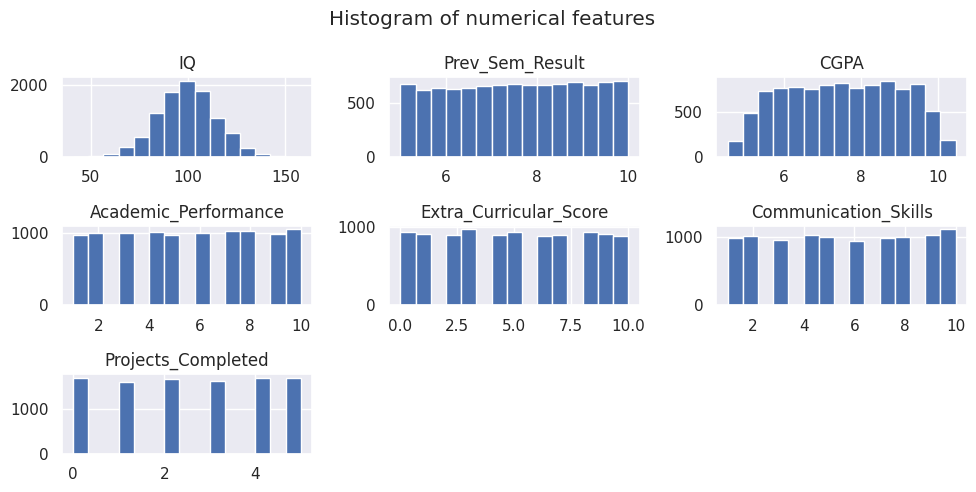

In [95]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set(style="darkgrid")
plt.figure(figsize=(10, 10))
df.select_dtypes(include=['number']).hist(bins=15, figsize=(10, 5))
plt.suptitle('Histogram of numerical features')
plt.tight_layout()
plt.show()

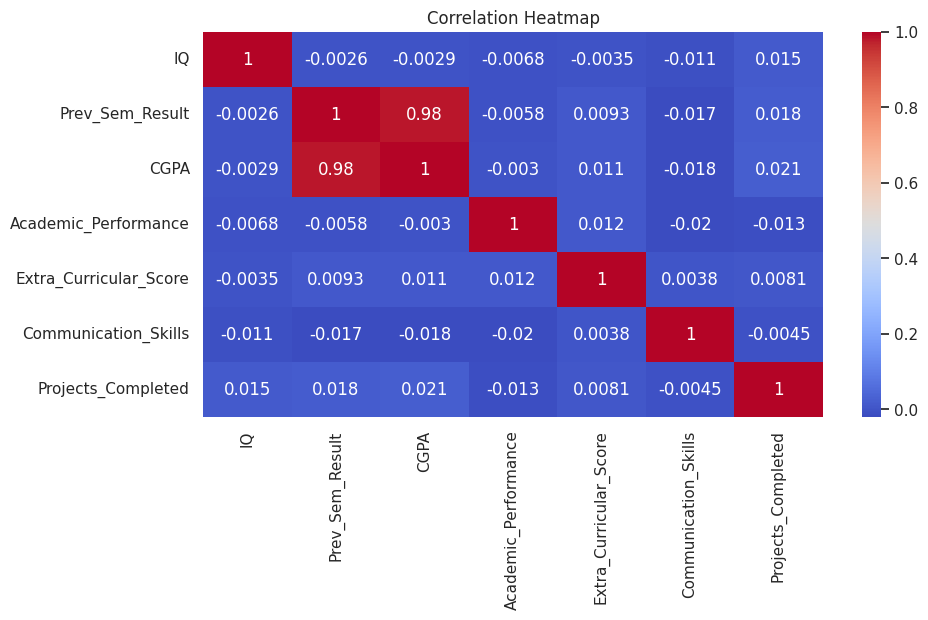

In [96]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [97]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# Dropping the college ID
df = df.drop(columns=['College_ID'], errors='ignore')

#Encoding Catagorical columns
for col in df.select_dtypes(include=['object']).columns:
  df[col] = LabelEncoder().fit_transform(df[col].astype(str))

# Chossing the target
target_col = "Placement"
x = df.drop(columns=[target_col])
y = df[target_col]

#Spilit and scale
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


#Models
models = {
    "Logistic Regression" : LogisticRegression(),
    "Decision Tree" : DecisionTreeClassifier(),
    "Random Forest" : RandomForestClassifier(),
    "Support Vector Machine" : SVC(),
    "K-Nearest Neighbours" : KNeighborsClassifier(),
    "XGBoost" : XGBClassifier(),
}

#Train Predict Evulate
for name, model in models.items():
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  acc = accuracy_score(y_test, y_pred) * 100
  print(f"{name} Accuracy: {acc:.2f}%")

Logistic Regression Accuracy: 90.35%
Decision Tree Accuracy: 100.00%
Random Forest Accuracy: 100.00%
Support Vector Machine Accuracy: 94.90%
K-Nearest Neighbours Accuracy: 94.70%
XGBoost Accuracy: 100.00%


In [98]:
#Perceptron
from sklearn.linear_model import Perceptron
clf = Perceptron(
    max_iter=1000,
    eta0=0.1,
    random_state=42,
    tol=1e-3,
    shuffle=True,
)

clf.fit(x_train, y_train)

accuracy = clf.score(x_test, y_test) * 100
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 86.20


In [99]:
#Tensorflow
import tensorflow as tf
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


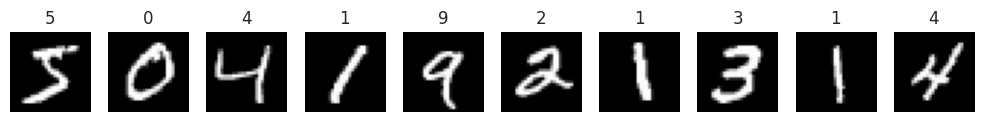

In [100]:
plt.figure(figsize=(10, 5))
for i in range(10):
  plt.subplot(1, 10, i + 1)
  plt.imshow(x_train[i], cmap="gray")
  plt.axis("off")
  plt.title(str(y_train[i]))
plt.tight_layout()
plt.show()

Neural Netorks

In [101]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [102]:
#Loading The Data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#Normalizing the data
x_train = x_train / 255.0
x_test = x_test / 255.0

#One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


***Building a small neural network***

In [103]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation="relu"),
    Dense(10, activation="softmax"),
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Compiling The **Model**

In [104]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

Traning the *model*

In [105]:
history = model.fit(x_train, y_train, epochs=15, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8824 - loss: 0.4263 - val_accuracy: 0.9576 - val_loss: 0.1468
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9653 - loss: 0.1215 - val_accuracy: 0.9694 - val_loss: 0.1014
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9777 - loss: 0.0774 - val_accuracy: 0.9697 - val_loss: 0.0934
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9835 - loss: 0.0556 - val_accuracy: 0.9745 - val_loss: 0.0794
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9882 - loss: 0.0401 - val_accuracy: 0.9736 - val_loss: 0.0833
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9900 - loss: 0.0346 - val_accuracy: 0.9778 - val_loss: 0.0747
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9916 - loss: 0.0266 - val_accuracy: 0.9775 - val_loss: 0.0724
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9938 - loss: 0.021

**Evaulating the model**

In [106]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9729 - loss: 0.1223
Test Accuracy: 0.98
